In [4]:
#### Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns

#### Part I - Data Preparation and Wrangling

***Data Loading and Preparation***:

  - Are there any missing values? Ideally, there shouldn't be any.
  - Are there any variables which are of an incorrect datatype? For e.g. categorical columns are stored as integers in the data set. In case you encounter such issues, make sure you convert the columns to the correct datatypes.

In [5]:
## Load the dataset
df=pd.read_csv(r'C:\Users\itssa\Downloads\data_app.csv')
df

CustomerID  Adopt  Gender  Age  Nationality  Loyalty  Tenure  Post  \
0           1001      1    Male   34            1        2      57     1   
1           1002      1  Female   36            1        2       5     1   
2           1003      1  Female   43            1        1      12     1   
3           1004      1    Male   47            1        1      70     1   
4           1005      1    Male   41            1        2      13     1   
...          ...    ...     ...  ...          ...      ...     ...   ...   
3995         996      0    Male   25            1        1      16     0   
3996         997      0  Female   51            0        1      54     0   
3997         998      0  Female   39            1        2      58     0   
3998         999      0    Male   23            1        4      57     0   
3999        1000      0    Male   45            1        1       3     0   

      NumBookings  Spending  
0              18      5760  
1               6      1830  
2               9      2682  
3              21      6846  
4              11      3377  
...           ...       ...  
3995            5      1420  
3996           15      4395  
3997           18      5166  
3998           18      4896  
3999            7      1470  

[4000 rows x 10 columns]

In [6]:
## Check the datatypes and missing values
## Hint - You can evaluate both using a single method


missing_data = df.info()
missing_data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerID   4000 non-null   int64 
 1   Adopt        4000 non-null   int64 
 2   Gender       4000 non-null   object
 3   Age          4000 non-null   int64 
 4   Nationality  4000 non-null   int64 
 5   Loyalty      4000 non-null   int64 
 6   Tenure       4000 non-null   int64 
 7   Post         4000 non-null   int64 
 8   NumBookings  4000 non-null   int64 
 9   Spending     4000 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 312.6+ KB


##### Record your observations

In [7]:
### Convert the columns which are of incorrect datatypes (if any) to the correct datatype


# Convert 'Gender' column to the correct data type
df['Gender'] = df['Gender'].astype(str)  # Assuming it should be a string type

# Display the updated data types
print(df.dtypes)


CustomerID      int64
Adopt           int64
Gender         object
Age             int64
Nationality     int64
Loyalty         int64
Tenure          int64
Post            int64
NumBookings     int64
Spending        int64
dtype: object


#### Part II: Exploratory Data Analysis

***Univariate Analysis I: Data summary of customers’ characteristics***

   - Use appropriate tables for the summary statistics and charts and describe the customers’ characteristics. You may restrict yourself to the univariate analysis of these variables:

          - Demographics: Gender, age, nationality
          - Loyalty membership and tenure with the hotel chain (in months)

In [8]:
### Before starting with Univariate Analysis, make sure to filter the dataframe to only include one period, either Post = 0 or Post = 1
### This way there won't be any repetitions in demographics data for the same customer

### WRITE CODE FOR FILTERING THE DATAFRAME

# Filter the DataFrame for Post = 0
df_post_0 = df.loc[df['Post'] == 0]

# or using boolean indexing
# df_post_0 = df[df['Post'] == 0]

# Display the filtered DataFrame
print(df_post_0)


      CustomerID  Adopt  Gender  Age  Nationality  Loyalty  Tenure  Post  \
1000        1001      1    Male   34            1        2      57     0   
1001        1002      1  Female   36            1        2       5     0   
1002        1003      1  Female   43            1        1      12     0   
1003        1004      1    Male   47            1        1      70     0   
1004        1005      1    Male   41            1        2      13     0   
...          ...    ...     ...  ...          ...      ...     ...   ...   
3995         996      0    Male   25            1        1      16     0   
3996         997      0  Female   51            0        1      54     0   
3997         998      0  Female   39            1        2      58     0   
3998         999      0    Male   23            1        4      57     0   
3999        1000      0    Male   45            1        1       3     0   

      NumBookings  Spending  
1000           14      3976  
1001            5      1455

In [9]:
### Next let's start making plots to describe each customer characteristic using the above filtered dataframe

import matplotlib.pyplot as plt

# Plotting customer characteristics
plt.figure(figsize=(12, 6))



# Show the plots
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Age Distribution')

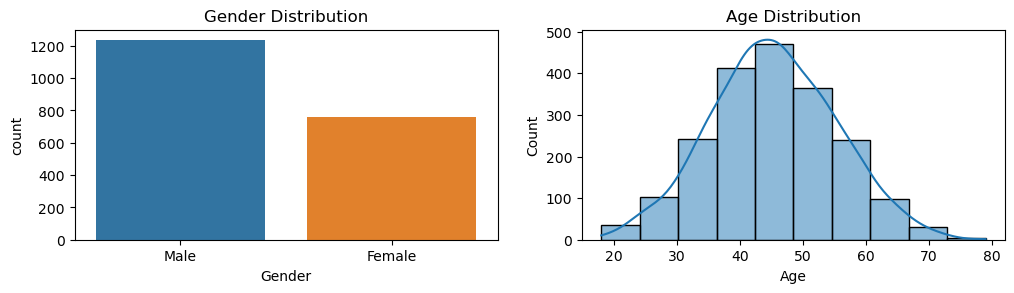

In [10]:
### Hint - If you're unsure what plots/summary statistics to use, inspect the datatypes (categorical or numerical) for the demographic characteristics
### Next, revise your EDA I and EDA II modules to understand which charts are useful for a specific datatype
# Separate categorical and numerical columns
categorical_columns = df_post_0.select_dtypes(include=['object']).columns
numerical_columns = df_post_0.select_dtypes(include=['number']).columns

# Plotting customer characteristics based on data type
plt.figure(figsize=(12, 6))

# Plot 1: Gender distribution (Categorical)
plt.subplot(2, 2, 1)
sns.countplot(x='Gender', data=df_post_0)
plt.title('Gender Distribution')

# Plot 2: Age distribution (Numerical)
plt.subplot(2, 2, 2)
sns.histplot(df_post_0['Age'], bins=10, kde=True)
plt.title('Age Distribution')

# Add more plots based on data type


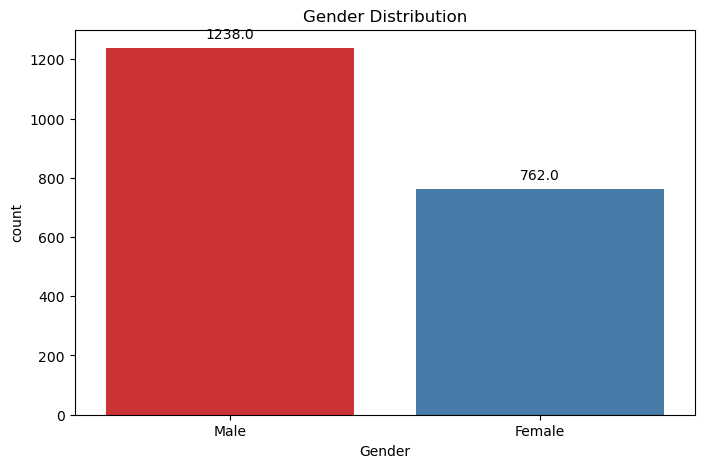

Gender Summary Statistics:
Gender
Male      1238
Female     762
Name: count, dtype: int64


In [11]:
### WRITE CODE FOR ANALYSING "GENDER" VARIABLE
# Plotting Gender distribution
plt.figure(figsize=(8, 5))

# Plot 1: Count plot for Gender
sns.countplot(x='Gender', data=df_post_0, palette='Set1')
plt.title('Gender Distribution')

# Display count values on top of bars
for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()

# Calculate summary statistics
gender_stats = df_post_0['Gender'].value_counts()

# Display summary statistics
print("Gender Summary Statistics:")
print(gender_stats)


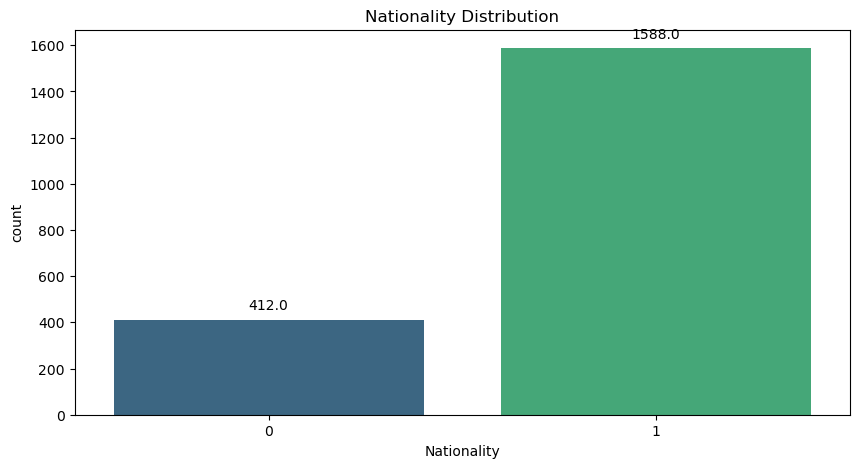

Nationality Summary Statistics:
Nationality
1    1588
0     412
Name: count, dtype: int64


In [12]:
### WRITE CODE FOR ANALYSING "NATIONALITY" VARIABLE

# Plotting Nationality distribution
plt.figure(figsize=(10, 5))

# Plot 1: Count plot for Nationality
sns.countplot(x='Nationality', data=df_post_0, palette='viridis')
plt.title('Nationality Distribution')

# Display count values on top of bars
for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()

# Calculate summary statistics
nationality_stats = df_post_0['Nationality'].value_counts()

# Display summary statistics
print("Nationality Summary Statistics:")
print(nationality_stats)


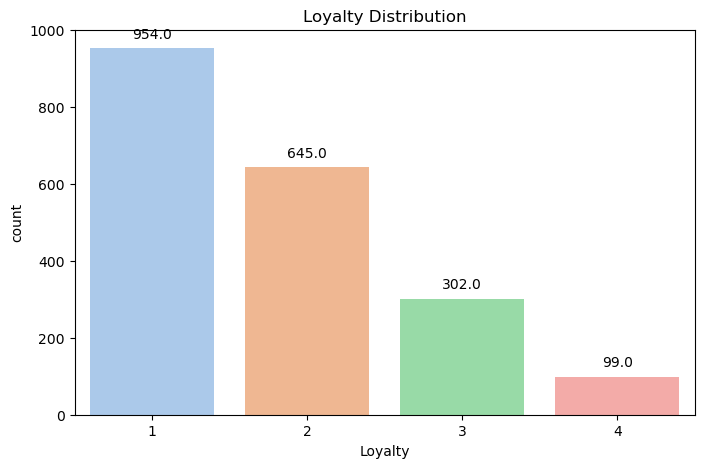

Loyalty Summary Statistics:
Loyalty
1    954
2    645
3    302
4     99
Name: count, dtype: int64


In [13]:
### WRITE CODE FOR ANALYSING "LOYALTY"
# Plotting Loyalty distribution
plt.figure(figsize=(8, 5))

# Plot 1: Count plot for Loyalty
sns.countplot(x='Loyalty', data=df_post_0, palette='pastel')
plt.title('Loyalty Distribution')

# Display count values on top of bars
for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()

# Calculate summary statistics
loyalty_stats = df_post_0['Loyalty'].value_counts()

# Display summary statistics
print("Loyalty Summary Statistics:")
print(loyalty_stats)


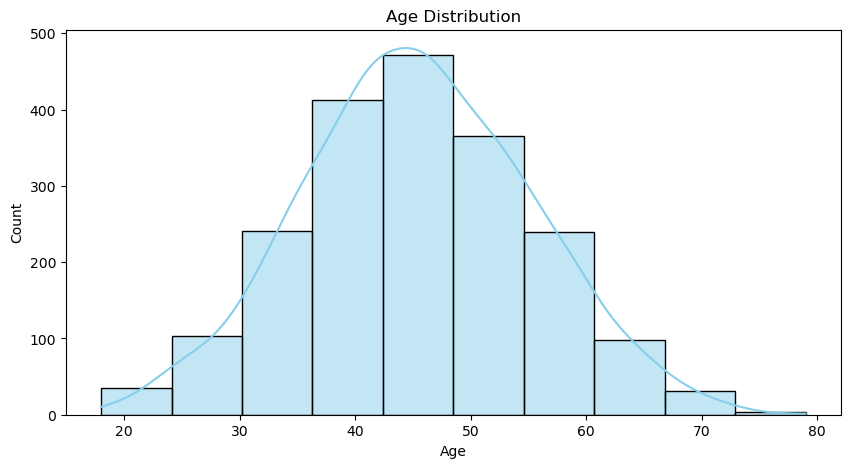

Age Summary Statistics:
count    2000.000000
mean       45.364000
std         9.958016
min        18.000000
25%        39.000000
50%        45.000000
75%        52.000000
max        79.000000
Name: Age, dtype: float64


In [14]:
### WRITE CODE FOR ANALYSING "AGE"
# Plotting Age distribution
plt.figure(figsize=(10, 5))

# Plot 1: Histogram for Age
sns.histplot(df_post_0['Age'], bins=10, kde=True, color='skyblue')
plt.title('Age Distribution')

# Show the plot
plt.show()

# Calculate summary statistics
age_stats = df_post_0['Age'].describe()

# Display summary statistics
print("Age Summary Statistics:")
print(age_stats)


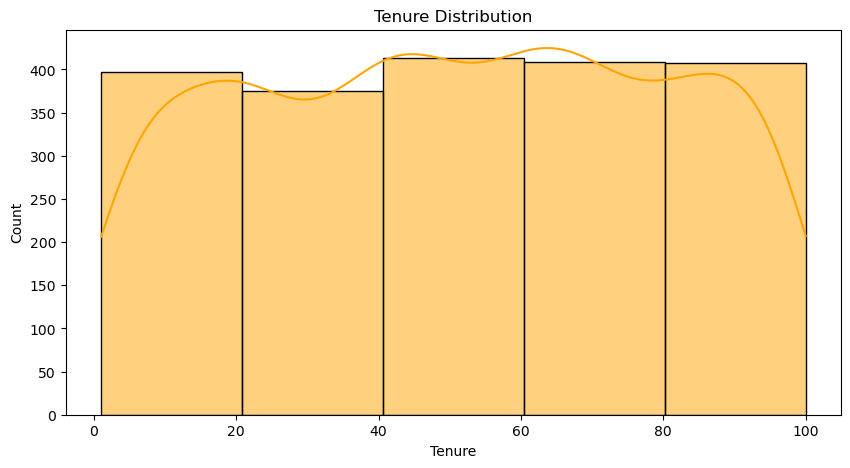

Tenure Summary Statistics:
count    2000.000000
mean       50.943000
std        28.600503
min         1.000000
25%        26.000000
50%        51.000000
75%        75.000000
max       100.000000
Name: Tenure, dtype: float64


In [15]:
### WRITE CODE FOR ANALYSING "TENURE"
# Plotting Tenure distribution
plt.figure(figsize=(10, 5))

# Plot 1: Histogram for Tenure
sns.histplot(df_post_0['Tenure'], bins=5, kde=True, color='orange')
plt.title('Tenure Distribution')

# Show the plot
plt.show()

# Calculate summary statistics
tenure_stats = df_post_0['Tenure'].describe()

# Display summary statistics
print("Tenure Summary Statistics:")
print(tenure_stats)


#### Part II: Exploratory Data Analysis

***Univariate Analysis II: Data summary of customers’ purchase behavior***

   - Use appropriate tables for the summary statistics and graphs and describe customers’ purchase behavior. You may restrict yourself to the univariate analysis of these variables::

          - Amount spent [Spending]
          - Number of bookings [NumBookings]

In [16]:
### For amount spent and number of bookings, we will get 2 values for the same customer
### One for Post = 0 and another for Post = 1
### You can analyze the data separately for Post = 0 and Post = 1 phases
# Separate data for Post = 0 and Post = 1
df_post_0 = df[df['Post'] == 0]
df_post_1 = df[df['Post'] == 1]

# Plotting Amount Spent for Post = 0
plt.figure(figsize=(12, 5))


# Show the plot
plt.tight_layout()
plt.show()


<Figure size 1200x500 with 0 Axes>

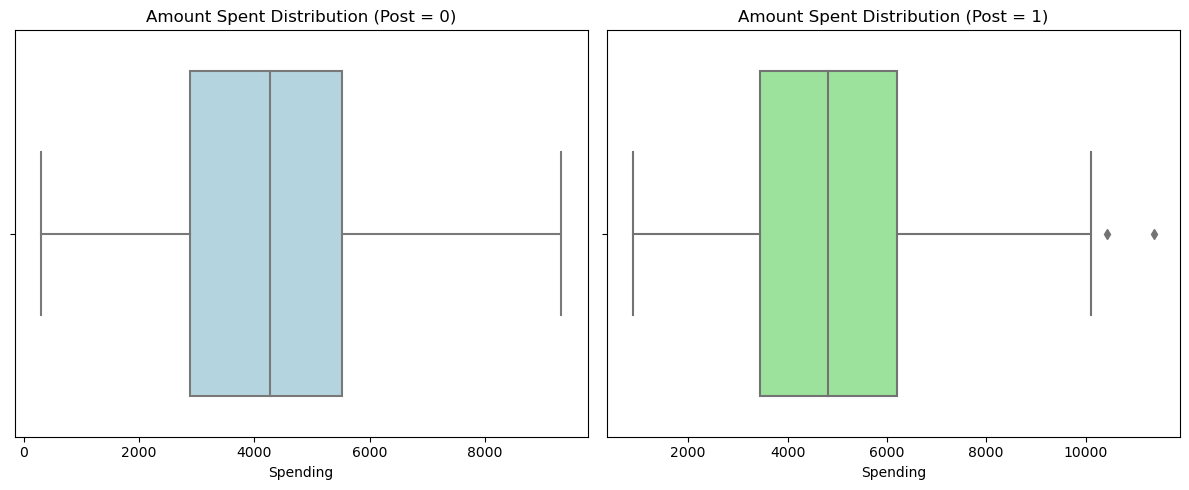

In [17]:
### WRITE CODE FOR ANALYSING "SPENDING"
# Plotting Amount Spent for Post = 0
plt.figure(figsize=(12, 5))

# Plot 1: Boxplot for Amount Spent Post = 0
plt.subplot(1, 2, 1)
sns.boxplot(x='Spending', data=df_post_0, color='lightblue')
plt.title('Amount Spent Distribution (Post = 0)')

# Plotting Amount Spent for Post = 1
plt.subplot(1, 2, 2)
# Plot 2: Boxplot for Amount Spent Post = 1
sns.boxplot(x='Spending', data=df_post_1, color='lightgreen')
plt.title('Amount Spent Distribution (Post = 1)')

# Show the plot
plt.tight_layout()
plt.show()

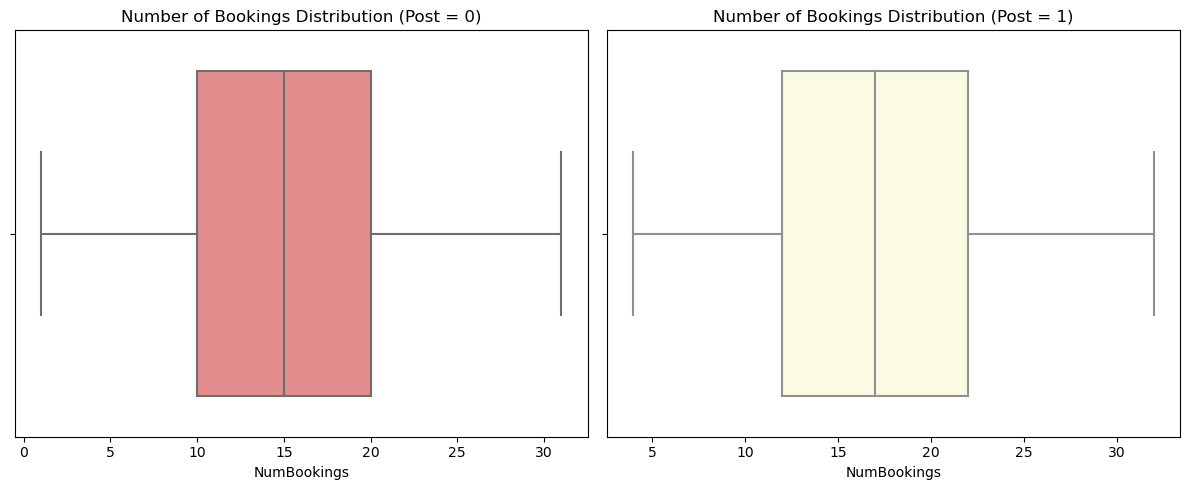

In [18]:
### WRITE CODE FOR ANALYSING "NUMBOOKINGS"
plt.figure(figsize=(12, 5))

# Plot 1: Boxplot for Number of Bookings Post = 0
plt.subplot(1, 2, 1)
sns.boxplot(x='NumBookings', data=df_post_0, color='lightcoral')
plt.title('Number of Bookings Distribution (Post = 0)')

# Plotting Number of Bookings for Post = 1
plt.subplot(1, 2, 2)
# Plot 2: Boxplot for Number of Bookings Post = 1
sns.boxplot(x='NumBookings', data=df_post_1, color='lightyellow')
plt.title('Number of Bookings Distribution (Post = 1)')

# Show the plot
plt.tight_layout()
plt.show()


***Multivariate Analysis:***

   - Construct relevant pivot tables, bar charts, and scatterplots to get a preliminary understanding of the relationship between customers’ characteristics and their purchase behavior. (Generally, bar charts are more informative in the case of categorical variables [e.g., the average of Spending broken up by Gender], while scatterplots convey more information in the case of numerical variables [e.g., Spending versus Age])

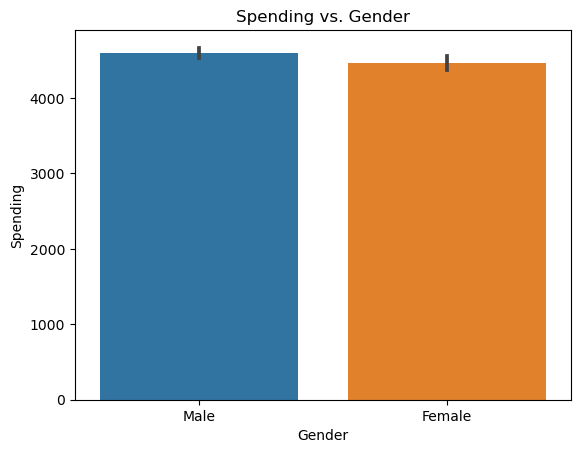

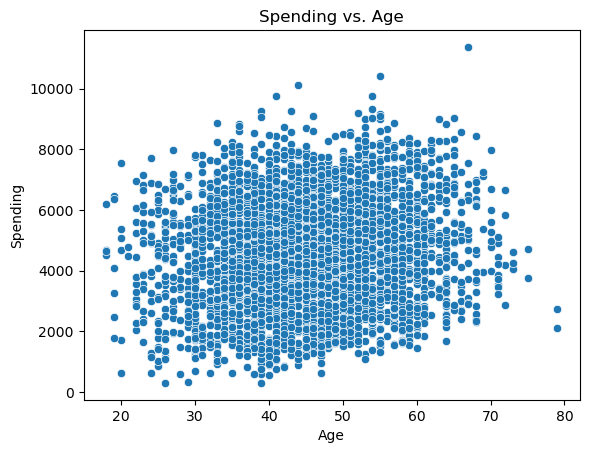

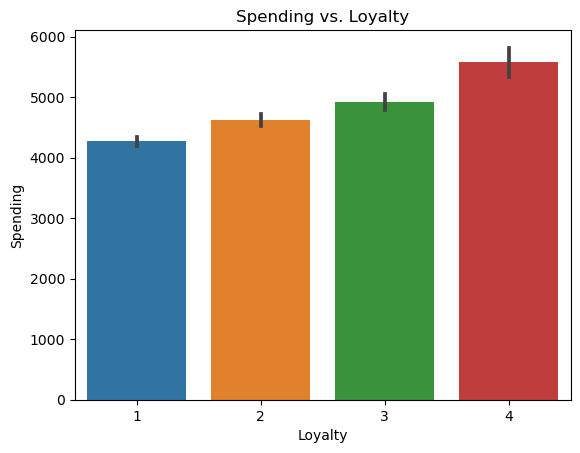

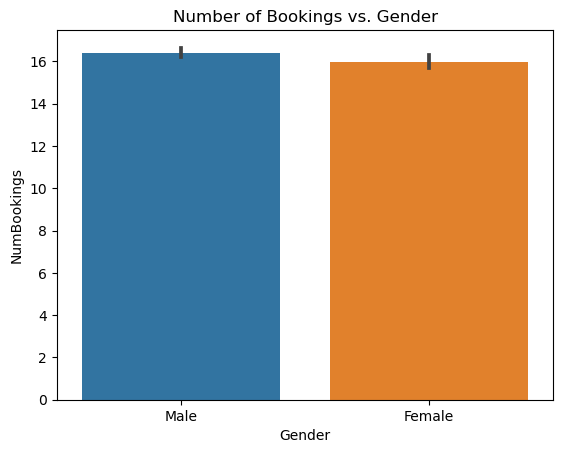

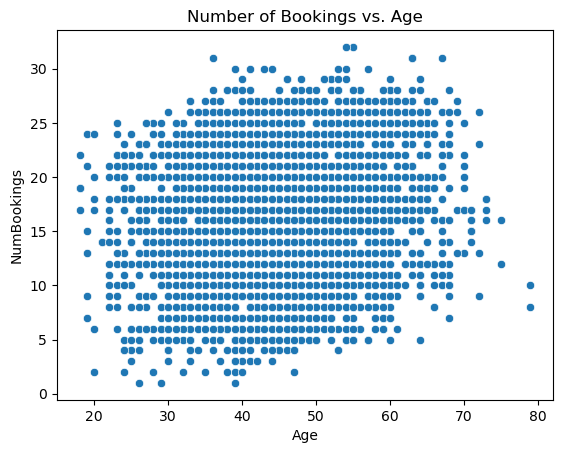

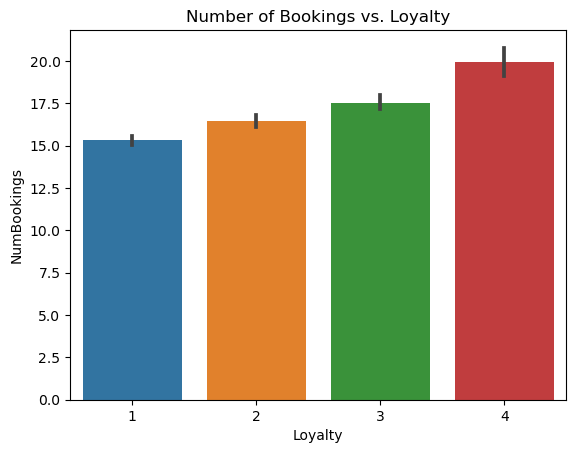

Pivot Table - Spending vs. Gender:
            Spending
Gender             
Female  4461.074147
Male    4600.289176
Pivot Table - Spending vs. Age:
         Spending
Age             
18   5013.500000
19   4076.500000
20   4170.666667
21   4641.000000
22   3989.571429
23   4419.000000
24   4078.150000
25   3865.041667
26   3646.666667
27   4851.000000
28   4225.045455
29   3715.500000
30   3409.242424
31   4144.500000
32   4585.258621
33   4329.421053
34   4516.088889
35   4523.166667
36   4566.009804
37   4248.111111
38   4445.500000
39   3927.686567
40   4446.296875
41   4427.091954
42   4063.625000
43   4393.993976
44   4652.700000
45   4383.213483
46   4573.319277
47   4793.304878
48   4596.528986
49   4243.706349
50   4867.070423
51   4727.707692
52   4709.602041
53   5074.844595
54   4669.860465
55   5020.100000
56   5350.812500
57   4711.587500
58   4310.925000
59   4678.125000
60   4903.136364
61   4857.645833
62   5743.437500
63   5599.400000
64   4626.136364
65   5870.333333
6

In [19]:
### In this section, you are free to choose the variables you want to analyse and the number of analyses you want to perform.
### For example, you can peform the following analyses.

### Analyze the relationship Spending and Gender.
### Analyze the relationship between Spending and Age.
### Analyze the relationship between Spending and Loyalty.
### .... and so on.

### As suggested before, you are free to choose the variables for analysis.
### Also, you're free to use the necessary tools (either pivot tables or visualizations or both) to perform the analyses
### However, make sure that you analyze the patterns for Spending and Number of Bookings against minimum 3 customer characteristics

# Visualization 1: Spending vs. Gender
sns.barplot(x='Gender', y='Spending', data=df)
plt.title('Spending vs. Gender')
plt.show()

# Visualization 2: Spending vs. Age
sns.scatterplot(x='Age', y='Spending', data=df)
plt.title('Spending vs. Age')
plt.show()

# Visualization 3: Spending vs. Loyalty
sns.barplot(x='Loyalty', y='Spending', data=df)
plt.title('Spending vs. Loyalty')
plt.show()

# Visualization 4: Number of Bookings vs. Gender
sns.barplot(x='Gender', y='NumBookings', data=df)
plt.title('Number of Bookings vs. Gender')
plt.show()

# Visualization 5: Number of Bookings vs. Age
sns.scatterplot(x='Age', y='NumBookings', data=df)
plt.title('Number of Bookings vs. Age')
plt.show()

# Visualization 6: Number of Bookings vs. Loyalty
sns.barplot(x='Loyalty', y='NumBookings', data=df)
plt.title('Number of Bookings vs. Loyalty')
plt.show()

# Pivot Table 1: Spending vs. Gender
pivot_gender_spending = df.pivot_table(index='Gender', values='Spending', aggfunc='mean')
print("Pivot Table - Spending vs. Gender:\n", pivot_gender_spending)

# Pivot Table 2: Spending vs. Age
pivot_age_spending = df.pivot_table(index='Age', values='Spending', aggfunc='mean')
print("Pivot Table - Spending vs. Age:\n", pivot_age_spending)

# Pivot Table 3: Spending vs. Loyalty
pivot_loyalty_spending = df.pivot_table(index='Loyalty', values='Spending', aggfunc='mean')
print("Pivot Table - Spending vs. Loyalty:\n", pivot_loyalty_spending)

# Pivot Table 4: Number of Bookings vs. Gender
pivot_gender_bookings = df.pivot_table(index='Gender', values='NumBookings', aggfunc='mean')
print("Pivot Table - Number of Bookings vs. Gender:\n", pivot_gender_bookings)

# Pivot Table 5: Number of Bookings vs. Age
pivot_age_bookings = df.pivot_table(index='Age', values='NumBookings', aggfunc='mean')
print("Pivot Table - Number of Bookings vs. Age:\n", pivot_age_bookings)

# Pivot Table 6: Number of Bookings vs. Loyalty
pivot_loyalty_bookings = df.pivot_table(index='Loyalty', values='NumBookings', aggfunc='mean')
print("Pivot Table - Number of Bookings vs. Loyalty:\n", pivot_loyalty_bookings)



- Generate a table of the correlations of all numerical variables of the data set.



Correlation Matrix:
               CustomerID         Adopt           Age   Nationality  \
CustomerID   1.000000e+00  8.660255e-01 -4.260377e-02 -1.708152e-02   
Adopt        8.660255e-01  1.000000e+00 -5.022336e-02 -7.417839e-03   
Age         -4.260377e-02 -5.022336e-02  1.000000e+00  1.589144e-02   
Nationality -1.708152e-02 -7.417839e-03  1.589144e-02  1.000000e+00   
Loyalty      1.792886e-02  1.249943e-02 -1.094271e-02 -7.361306e-04   
Tenure      -1.808458e-02 -2.927254e-02 -1.587762e-02 -7.457786e-03   
Post         1.415726e-15  2.682077e-15  1.003517e-15  6.002789e-16   
NumBookings -2.371725e-02 -3.986292e-02  1.497593e-01  3.173407e-02   
Spending     1.375778e-01  1.452519e-01  1.423946e-01  2.804337e-02   

                  Loyalty        Tenure          Post  NumBookings  Spending  
CustomerID   1.792886e-02 -1.808458e-02  1.415726e-15    -0.023717  0.137578  
Adopt        1.249943e-02 -2.927254e-02  2.682077e-15    -0.039863  0.145252  
Age         -1.094271e-02 -1.587

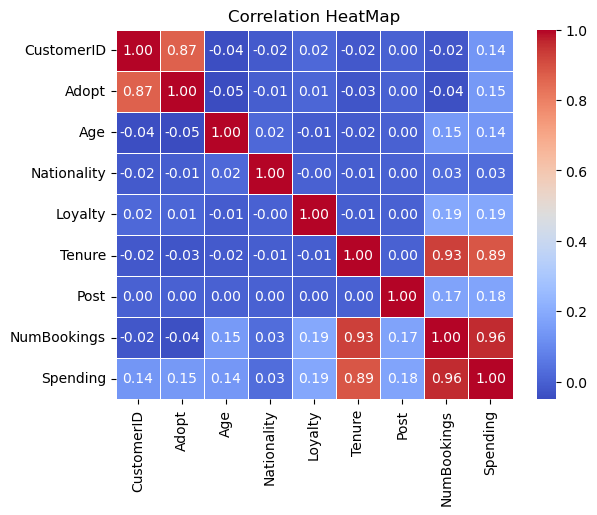

In [20]:
### Subset the dataframe to only include the numerical variables
### After that you can create a correlation matrix.
### If you want, you can also build a HeatMap, but it's optional.

# Assuming you have a DataFrame named 'df' with numerical variables

# Subset the dataframe to only include numerical variables
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Create a correlation matrix
correlation_matrix = numerical_df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Optional: Create a HeatMap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Correlation HeatMap')
plt.show()


 - Determine whether there is a statistically significant difference between the average spending of men and women (at a 5% significance level)? Conduct an appropriate hypothesis test to determine whether there is a difference in means. Please construct a 95% confidence interval for the difference in means. You may assume independent samples and constant variance. [Note: The above test is to be conducted for the entire data set]

In [21]:
pip install pingouin

Note: you may need to restart the kernel to use updated packages.


In [22]:
### This task may seem intimidating at first.
### However, using the ttest method pingouin package which you learned in the "Designing Business Experiments" module, you should be able to get all the results directly.

import pandas as pd
import pingouin as pg

# Assuming you have a DataFrame named 'df' with columns: 'Spending' and 'Gender'
# You can replace these column names with your actual column names.

# Subset the dataframe to include only 'Spending' and 'Gender'
subset_df = df[['Spending', 'Gender']]

# Separate the data into two groups: Men and Women
men_spending = subset_df[subset_df['Gender'] == 'Male']['Spending']
women_spending = subset_df[subset_df['Gender'] == 'Female']['Spending']

# Conduct a t-test
ttest_result = pg.ttest(men_spending, women_spending)

# Display the t-test result
print("T-test Result:\n", ttest_result)

# Extract the p-value and 95% confidence interval
p_value = ttest_result['p-val'].values[0]
conf_interval = ttest_result['CI95%'].values[0]

# Check if the p-value is less than the significance level (e.g., 0.05)
if p_value < 0.05:
    print("\nThere is a statistically significant difference between the average spending of men and women.")

# Display the 95% confidence interval
print("\n95% Confidence Interval for the Difference in Means:", conf_interval)



T-test Result:
                T          dof alternative     p-val            CI95%  \
T-test  2.396388  3199.526177   two-sided  0.016615  [25.31, 253.12]   

         cohen-d   BF10     power  
T-test  0.078202  0.639  0.670527  

There is a statistically significant difference between the average spending of men and women.

95% Confidence Interval for the Difference in Means: [ 25.31 253.12]


#### Part III: Statistical Analysis

***After-Only design***
   - To determine the treatment effect of customers’ adoption of the app on their spending with the hotel chain, construct a pivot table of average Spending broken up by Adopt and Post. What is the difference between the treatment and control groups’ spending in the Post =1 period? This is the treatment effect, assuming the experiment is of an After-Only design.

In [23]:
### WRITE CODE FOR CONSTRUCTING A PIVOT TABLE
### Hint - Check the documentation of pivot table


### Report the difference between the spending of treatment and control groups in Post = 1 period.


# Assuming you have a DataFrame named 'df' with columns: 'Spending', 'Adopt', 'Post'
# You can replace these column names with your actual column names.

# Create a pivot table to calculate the average spending broken up by Adopt and Post
pivot_table = pd.pivot_table(df, values='Spending', index=['Adopt'], columns=['Post'], aggfunc='mean')

# Display the pivot table
print("Pivot Table - Average Spending broken up by Adopt and Post:\n", pivot_table)

# Calculate the difference between treatment (Adopt = 1) and control (Adopt = 0) groups in Post = 1 period
treatment_spending = pivot_table.loc[1, 1]  # Treatment group spending in Post = 1
control_spending = pivot_table.loc[0, 1]  # Control group spending in Post = 1
treatment_effect = treatment_spending - control_spending

# Display the difference in spending between treatment and control groups in Post = 1 period
print("\nDifference in Spending between Treatment and Control Groups in Post = 1 period:", treatment_effect)


Pivot Table - Average Spending broken up by Adopt and Post:
 Post          0         1
Adopt                    
0      4188.753  4388.343
1      4275.593  5336.304

Difference in Spending between Treatment and Control Groups in Post = 1 period: 947.9610000000002


  - Is the above treatment effect statistically significant? Perform the necessary hypothesis test and construct a 95% confidence interval for the difference. Take the level of significance as 0.05

In [24]:
### Hint - Once again, you can use the ttest method in the pingouin package to perform this task quickly.


# Assuming you have a DataFrame named 'df' with columns: 'Spending', 'Adopt', 'Post'
# You can replace these column names with your actual column names.

# Separate the data into treatment (Adopt = 1) and control (Adopt = 0) groups for Post = 1
treatment_data = df[(df['Adopt'] == 1) & (df['Post'] == 1)]['Spending']
control_data = df[(df['Adopt'] == 0) & (df['Post'] == 1)]['Spending']

# Conduct a t-test
ttest_result = pg.ttest(treatment_data, control_data)

# Display the t-test result
print("T-test Result for Treatment Effect:\n", ttest_result)

# Extract the p-value and 95% confidence interval
p_value = ttest_result['p-val'].values[0]
conf_interval = ttest_result['CI95%'].values[0]

# Check if the p-value is less than the significance level (0.05)
if p_value < 0.05:
    print("\nThe treatment effect is statistically significant.")

# Display the 95% confidence interval
print("\n95% Confidence Interval for the Difference in Means:", conf_interval)


T-test Result for Treatment Effect:
                 T   dof alternative         p-val             CI95%   cohen-d  \
T-test  12.193523  1998   two-sided  4.868695e-33  [795.5, 1100.43]  0.545311   

             BF10  power  
T-test  4.544e+29    1.0  

The treatment effect is statistically significant.

95% Confidence Interval for the Difference in Means: [ 795.5  1100.43]


***Before-After design***


- Construct a new DataFrame, where for each customer, you have a new variable, which is the difference in spending between the Post = 1 and Post= 0 periods.


In [25]:
### This task can be slightly challenging and hence for performing this we have suggested the following approach
### Step 1 - Create 2 separate temporary dataframes, each filtered by Post = 1 and Post = 0 periods
### Step 2 - Merge these two dataframes using the pandas.merge() method based on the "CustomerID" and store this in a new Dataframe
### Step 3 - After merging, you may encounter repeated columns (denoted by a suffix like "_x" & "_y" ). Identify which ones you want to keep
###, and which ones you want to drop. Make sure you keep the Spending columns for both Post = 1 and Post = 0 periods.
### Step 4 - In the new merged Dataframe, create a new column which is the difference between the Spending in Post = 1 and Post = 0 for each customer
### For ease of use, you can name this column as "Diff". This will be useful in the final task of this section


# Assuming you have a DataFrame named 'df' with columns: 'CustomerID', 'Spending', 'Post'
# You can replace these column names with your actual column names.

# Step 1: Create separate temporary DataFrames for Post = 1 and Post = 0
post_1_df = df[df['Post'] == 1][['CustomerID', 'Spending']]
post_0_df = df[df['Post'] == 0][['CustomerID', 'Spending']]

# Step 2: Merge the two DataFrames based on "CustomerID"
merged_df = pd.merge(post_1_df, post_0_df, on='CustomerID', suffixes=('_post_1', '_post_0'))

# Step 3: Keep the necessary columns and drop repeated columns
# In this example, we are keeping 'Spending_post_1' and 'Spending_post_0' columns
merged_df = merged_df[['CustomerID', 'Spending_post_1', 'Spending_post_0']]

# Step 4: Create a new column "Diff" representing the difference in spending between Post = 1 and Post = 0
merged_df['Diff'] = merged_df['Spending_post_1'] - merged_df['Spending_post_0']

# Display the new DataFrame
print("New DataFrame with Difference in Spending:")
print(merged_df)


New DataFrame with Difference in Spending:
      CustomerID  Spending_post_1  Spending_post_0  Diff
0           1001             5760             3976  1784
1           1002             1830             1455   375
2           1003             2682             1656  1026
3           1004             6846             5148  1698
4           1005             3377             1782  1595
...          ...              ...              ...   ...
1995         996             1488             1420    68
1996         997             4403             4395     8
1997         998             4370             5166  -796
1998         999             5020             4896   124
1999        1000             1446             1470   -24

[2000 rows x 4 columns]


The above suggested approach is one of the many ways in which you can complete this task. Here are some helpful links for understanding how to use the `pandas.merge` method
- [Documentation](https://pandas.pydata.org/docs/reference/api/pandas.merge.html)
- [Youtube tutorial](https://www.youtube.com/watch?v=h4hOPGo4UVU)

---

- Compute the average spending difference between those with Adopt = 1 and those with Adopt = 0 in both the Post = 1 and Post = 0 periods. Call these differences Difference1 and Difference0. Compute the difference between these two differences as Difference1 – Difference0. This is the treatment effect in the Before-After design.

In [26]:
### To understand what why you're doing this, you can use the following image as a reference
### You have already learned this in the second session of the Designing Business Experiments module
### This is how you evaluate the treatment effect( or, Lift) in a Before-After Design
import pandas as pd

# Assuming df is your DataFrame with columns 'Adopt', 'Post', and 'Spending'
# Replace df with your actual DataFrame

# Filter data for Adopt = 1 in Post = 1
adopt1_post1 = df[(df['Adopt'] == 1) & (df['Post'] == 1)]['Spending']

# Filter data for Adopt = 0 in Post = 1
adopt0_post1 = df[(df['Adopt'] == 0) & (df['Post'] == 1)]['Spending']

# Filter data for Adopt = 1 in Post = 0
adopt1_post0 = df[(df['Adopt'] == 1) & (df['Post'] == 0)]['Spending']

# Filter data for Adopt = 0 in Post = 0
adopt0_post0 = df[(df['Adopt'] == 0) & (df['Post'] == 0)]['Spending']

# Calculate average spending differences
difference1 = adopt1_post1.mean() - adopt0_post1.mean()
difference0 = adopt1_post0.mean() - adopt0_post0.mean()

# Calculate treatment effect
treatment_effect = difference1 - difference0

print(f'Difference1: {difference1}')
print(f'Difference0: {difference0}')
print(f'Treatment Effect: {treatment_effect}')




Difference1: 947.9610000000002
Difference0: 86.84000000000015
Treatment Effect: 861.1210000000001


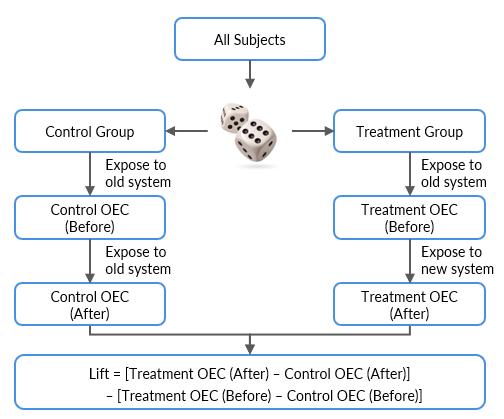

In case the above image isn't opening please use this [link](https://images.upgrad.com/48d5bfcc-c3e5-4ef3-9c5a-460568c08480-Image2.png)


In [27]:
## Once you go through the image, the task is fairly straightforward to do. Here is one of the suggested approaches
## Calculate the average spending for Customers from control group (Adopt = 0) in the period Post = 0
## Calculate the average spending for Customers from treamtent group (Adopt = 1) in the period Post = 0
## Calculate the difference between the above two values. This will be Difference0 (or Treatment OEC(Before) - Control OEC (Before))

## After the above, repeat the same steps for Post = 1 period
## Calculate the average spending for Customers from control group (Adopt = 0) in the period Post = 1
## Calculate the average spending for Customers from treamtent group (Adopt = 1) in the period Post = 1
## Calculate the difference between the above two values. This will be Difference1 (or Treatment OEC(After) - Control OEC (After))

### Finally calculate the difference between these two values (Difference1 - Difference0) to obtain the treatment effect.

import pandas as pd

# Assuming df is your DataFrame with columns 'Adopt', 'Post', and 'Spending'
# Replace df with your actual DataFrame

# Calculate Difference0 (Before Treatment Effect)
control_group_post0 = df[(df['Adopt'] == 0) & (df['Post'] == 0)]['Spending'].mean()
treatment_group_post0 = df[(df['Adopt'] == 1) & (df['Post'] == 0)]['Spending'].mean()
difference0 = treatment_group_post0 - control_group_post0

# Calculate Difference1 (After Treatment Effect)
control_group_post1 = df[(df['Adopt'] == 0) & (df['Post'] == 1)]['Spending'].mean()
treatment_group_post1 = df[(df['Adopt'] == 1) & (df['Post'] == 1)]['Spending'].mean()
difference1 = treatment_group_post1 - control_group_post1

# Calculate Treatment Effect
treatment_effect = difference1 - difference0

print(f'Difference0 (Before Treatment Effect): {difference0}')
print(f'Difference1 (After Treatment Effect): {difference1}')
print(f'Treatment Effect: {treatment_effect}')


Difference0 (Before Treatment Effect): 86.84000000000015
Difference1 (After Treatment Effect): 947.9610000000002
Treatment Effect: 861.1210000000001


- Is the above treatment effect statistically significant? Similar to the previous step, perform the necessary hypothesis test and construct a 95% confidence interval for the difference in differences. Take the level of significance as 0.05

In [28]:
### Once again, you can peform this task using the pingouin package
### In addition, you can use the "Diff" column from new DataFrame that you created in the first task of this section
### This will help in providing inputs to the ttest method from pingouin package.


# Assuming df is your DataFrame with the 'Diff' column
# Replace df with your actual DataFrame

# Split the data into control and treatment groups based on the 'Diff' column
control_group = df[df['Adopt'] == 0]['Spending']
treatment_group = df[df['Adopt'] == 1]['Spending']

# Perform a two-sample t-test using pingouin
ttest_result = pg.ttest(control_group, treatment_group)

# Extract the p-value from the result
p_value = ttest_result['p-val'].values[0]

print(f'p-value: {p_value}')

# Check if the p-value is statistically significant (e.g., less than 0.05)
if p_value < 0.05:
    print('The treatment effect is statistically significant.')
else:
    print('The treatment effect is not statistically significant.')


p-value: 2.6396622679771793e-20
The treatment effect is statistically significant.


# THE END 